In [1]:
# setup
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import (
    ColumnDataSource, Range1d, DataRange1d, DatetimeAxis,
    TickFormatter, DatetimeTickFormatter, FuncTickFormatter,
    Grid, Legend, Plot, BoxAnnotation, Span, CustomJS, Rect, Circle, Line,
    HoverTool, BoxZoomTool, PanTool, WheelZoomTool,
    WMTSTileSource, LabelSet
    )
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn, Div

import numpy as np
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), 'plot_app'))
from pyulog import *
from pyulog.px4 import *
from plotting import *
from config import *
from notebook_helper import *

output_notebook()

Loading BokehJS ...

In [2]:
#file_name = 'logs/log_60_2023-1-25-10-14-04.ulg' # initial vslam flight (didn't log)
file_name = 'logs/log_0_2023-1-25-16-17-39.ulg' # simulated flight using mission using PX4-Gazebo-Unity
#file_name = 'logs/log_84_2023-1-25-12-46-52.ulg' # drone getting stuck
ulog = ULog(file_name)
data = ulog.data_list
px4_ulog = PX4ULog(ulog)
px4_ulog.add_roll_pitch_yaw()
use_downsample = False

print("message names: {:}".format(sorted([d.name for d in data])))
print_ulog_info(ulog)

message names: ['actuator_armed', 'actuator_controls_0', 'actuator_outputs', 'battery_status', 'commander_state', 'control_allocator_status', 'cpuload', 'ekf2_timestamps', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_innovation_test_ratios', 'estimator_innovation_test_ratios', 'estimator_innovat

In [3]:
use_downsample = True # you may want to activate this for large logs (But you will not see all samples when zooming in)

In [3]:
# Plot GPS-based flight path
plot = plot_map(ulog, plot_config) 
if plot != None: show(plot)

In [4]:
# load a dataset to inspect the field names and types
vslam_sensor_data = [ elem for elem in data if elem.name == 'vehicle_visual_odometry' and elem.multi_id == 0][0]
types_list = [(f.type_str, f.field_name) for f in vslam_sensor_data.field_data]
for ftype, fname in types_list: print("{:10s} {:}".format(ftype, fname))

uint64_t   timestamp
uint64_t   timestamp_sample
float      x
float      y
float      z
float      q[0]
float      q[1]
float      q[2]
float      q[3]
float      q_offset[0]
float      q_offset[1]
float      q_offset[2]
float      q_offset[3]
float      pose_covariance[0]
float      pose_covariance[1]
float      pose_covariance[2]
float      pose_covariance[3]
float      pose_covariance[4]
float      pose_covariance[5]
float      pose_covariance[6]
float      pose_covariance[7]
float      pose_covariance[8]
float      pose_covariance[9]
float      pose_covariance[10]
float      pose_covariance[11]
float      pose_covariance[12]
float      pose_covariance[13]
float      pose_covariance[14]
float      pose_covariance[15]
float      pose_covariance[16]
float      pose_covariance[17]
float      pose_covariance[18]
float      pose_covariance[19]
float      pose_covariance[20]
float      vx
float      vy
float      vz
float      rollspeed
float      pitchspeed
float      yawspeed
float     

In [5]:
estimator_localpos_data = [ elem for elem in data if elem.name == 'estimator_local_position' and elem.multi_id == 0][0]
types_list = [(f.type_str, f.field_name) for f in estimator_localpos_data.field_data]
for ftype, fname in types_list: 
    print("{:10s} {:}".format(ftype, fname))

uint64_t   timestamp
uint64_t   timestamp_sample
uint64_t   ref_timestamp
double     ref_lat
double     ref_lon
float      x
float      y
float      z
float      delta_xy[0]
float      delta_xy[1]
float      delta_z
float      vx
float      vy
float      vz
float      z_deriv
float      delta_vxy[0]
float      delta_vxy[1]
float      delta_vz
float      ax
float      ay
float      az
float      heading
float      delta_heading
float      ref_alt
float      dist_bottom
float      eph
float      epv
float      evh
float      evv
float      vxy_max
float      vz_max
float      hagl_min
float      hagl_max
bool       xy_valid
bool       z_valid
bool       v_xy_valid
bool       v_z_valid
uint8_t    xy_reset_counter
uint8_t    z_reset_counter
uint8_t    vxy_reset_counter
uint8_t    vz_reset_counter
uint8_t    heading_reset_counter
bool       heading_good_for_control
bool       xy_global
bool       z_global
bool       dist_bottom_valid
uint8_t    dist_bottom_sensor_bitfield


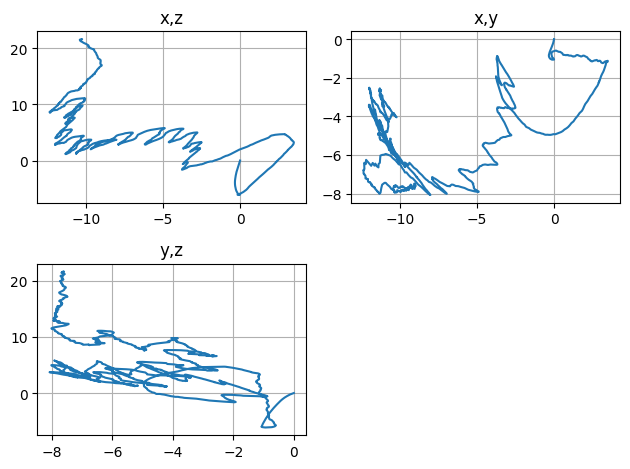

In [27]:
vehicle_visual_odometry = ulog.get_dataset('vehicle_visual_odometry').data
vslam_x = vehicle_visual_odometry['x']
vslam_y = vehicle_visual_odometry['y']
vslam_z = vehicle_visual_odometry['z']

plot1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 0), rowspan=1)

x = np.arange(1, 10)
  
# Plot 
plot2.plot(vslam_x,vslam_y)
plot2.set_title('x,y')
plot2.grid()

# Plot 
plot1.plot(vslam_x,vslam_z)
plot1.set_title('x,z')
plot1.grid()
  
# Plot 
plot3.plot(vslam_y,vslam_z)
plot3.set_title('y,z')
plot3.grid()
  
# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

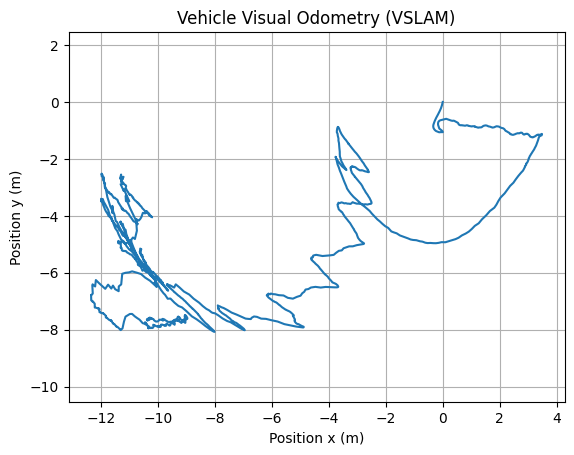

In [17]:
vehicle_visual_odometry = ulog.get_dataset('vehicle_visual_odometry').data
vslam_x = vehicle_visual_odometry['x']
vslam_y = vehicle_visual_odometry['y']
plt.plot(vslam_x,vslam_y)
plt.axis('equal')
plt.title('Vehicle Visual Odometry (VSLAM)')
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.grid()
plt.show()

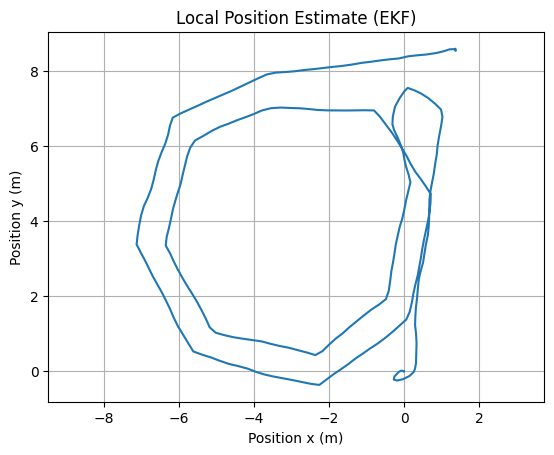

In [7]:
estimator_local_position = ulog.get_dataset('estimator_local_position').data
est_x = estimator_local_position['x']
est_y = estimator_local_position['y']
plt.plot(est_x,est_y)
plt.axis('equal')
plt.title('Local Position Estimate (EKF)')
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.grid()
plt.show()

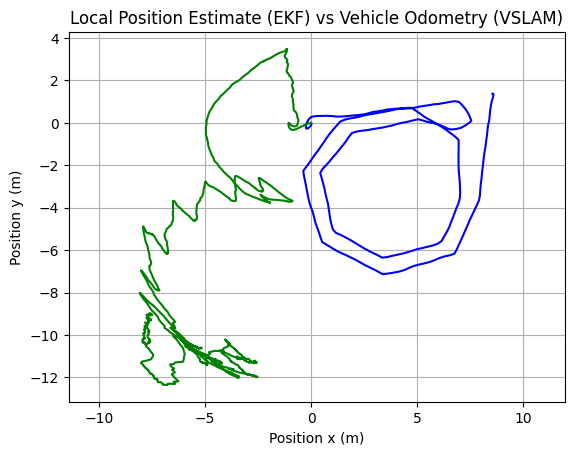

In [12]:
plt.plot(est_y,est_x, color='blue')
plt.plot(vslam_y,vslam_x, color='green')
plt.axis('equal')
plt.title('Local Position Estimate (EKF) vs Vehicle Odometry (VSLAM)')
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.grid()
plt.show()